In [18]:
from getdist import plots, loadMCSamples
import numpy as np
import matplotlib.pyplot as plt
# import uncertainties

plt.rc('mathtext', fontset='stix')
plt.rc('font', family='sans-serif')

g = plots.get_subplot_plotter(width_inch=30)
g.settings.axes_fontsize=35
g.settings.axes_labelsize=35
g.settings.alpha_filled_add = 0.7
g.settings.legend_fontsize = 40

%matplotlib inline
#SPECIFY DATA DIRECTORY AND DESIRED CHAINS TO ANALYSE
root_dir='/n17data/sguerrini/mcmc_xi_sys/'
roots = [
    'fake_SP_v1.4.1_noleakage_new_pipeline'
    ]


In [43]:
for root in roots:
    with open(root_dir + '{}/samples_{}.txt'.format('/'+root ,root), "r") as file:
        params = file.readline()[1:].split('\t')[:-4]
        file.close()
 
    with open(root_dir + '{}/getdist_{}.paramnames'.format('/'+root, root), "w") as file:
        for i in range(len(params)):
            if len(params[i].split('--')) > 1:
                file.write(params[i].split('--')[1] + '\n')
            else:
                file.write(params[i].split('--')[0] + '\n')
        file.close()
    print(params)

['cosmological_parameters--omch2', 'cosmological_parameters--h0', 'cosmological_parameters--ombh2', 'cosmological_parameters--n_s', 'cosmological_parameters--s_8_input', 'halo_model_parameters--logt_agn', 'intrinsic_alignment_parameters--a', 'intrinsic_alignment_parameters--eta', 'psf_leakage_parameters--alpha', 'psf_leakage_parameters--beta', 'COSMOLOGICAL_PARAMETERS--OMEGA_LAMBDA', 'COSMOLOGICAL_PARAMETERS--S_8', 'COSMOLOGICAL_PARAMETERS--SIGMA_8', 'COSMOLOGICAL_PARAMETERS--OMEGA_M']


## Retrieve the chains

In [44]:
#READ CHAIN

chains=[]

for root in roots:

    samples = np.loadtxt(root_dir + '{}/samples_{}.txt'.format(root,root))
    samples = np.column_stack((samples[:,-1],samples[:,-3],samples[:,0:-4]))
    np.savetxt(root_dir + '{}/getdist_{}.txt'.format(root,root), samples)
    
    chain = g.samples_for_root(root_dir + '{}/getdist_{}'.format(root,root),
                               cache=False,
                               settings={'ignore_rows':0,
                                         'smooth_scale_2D':0.7,
                                         'smooth_scale_1D':0.7})
    p = chain.getParams()
    chain.addDerived((p.omch2+p.ombh2)/p.h0**2, name='Omega_m', label=r'\Omega_m')
    # p = chain.getParams() 
    # if hasattr(p,'SIGMA_8')==False:
        # chain.addDerived(p.S_8/(np.sqrt(p.omega_m/0.3)), name='SIGMA_8', label=r'\sigma_8')

    chains.append(chain)

/n17data/sguerrini/mcmc_xi_sys/fake_SP_v1.4.1_noleakage_new_pipeline/getdist_fake_SP_v1.4.1_noleakage_new_pipeline.txt
Removed no burn in


## Plot the chain

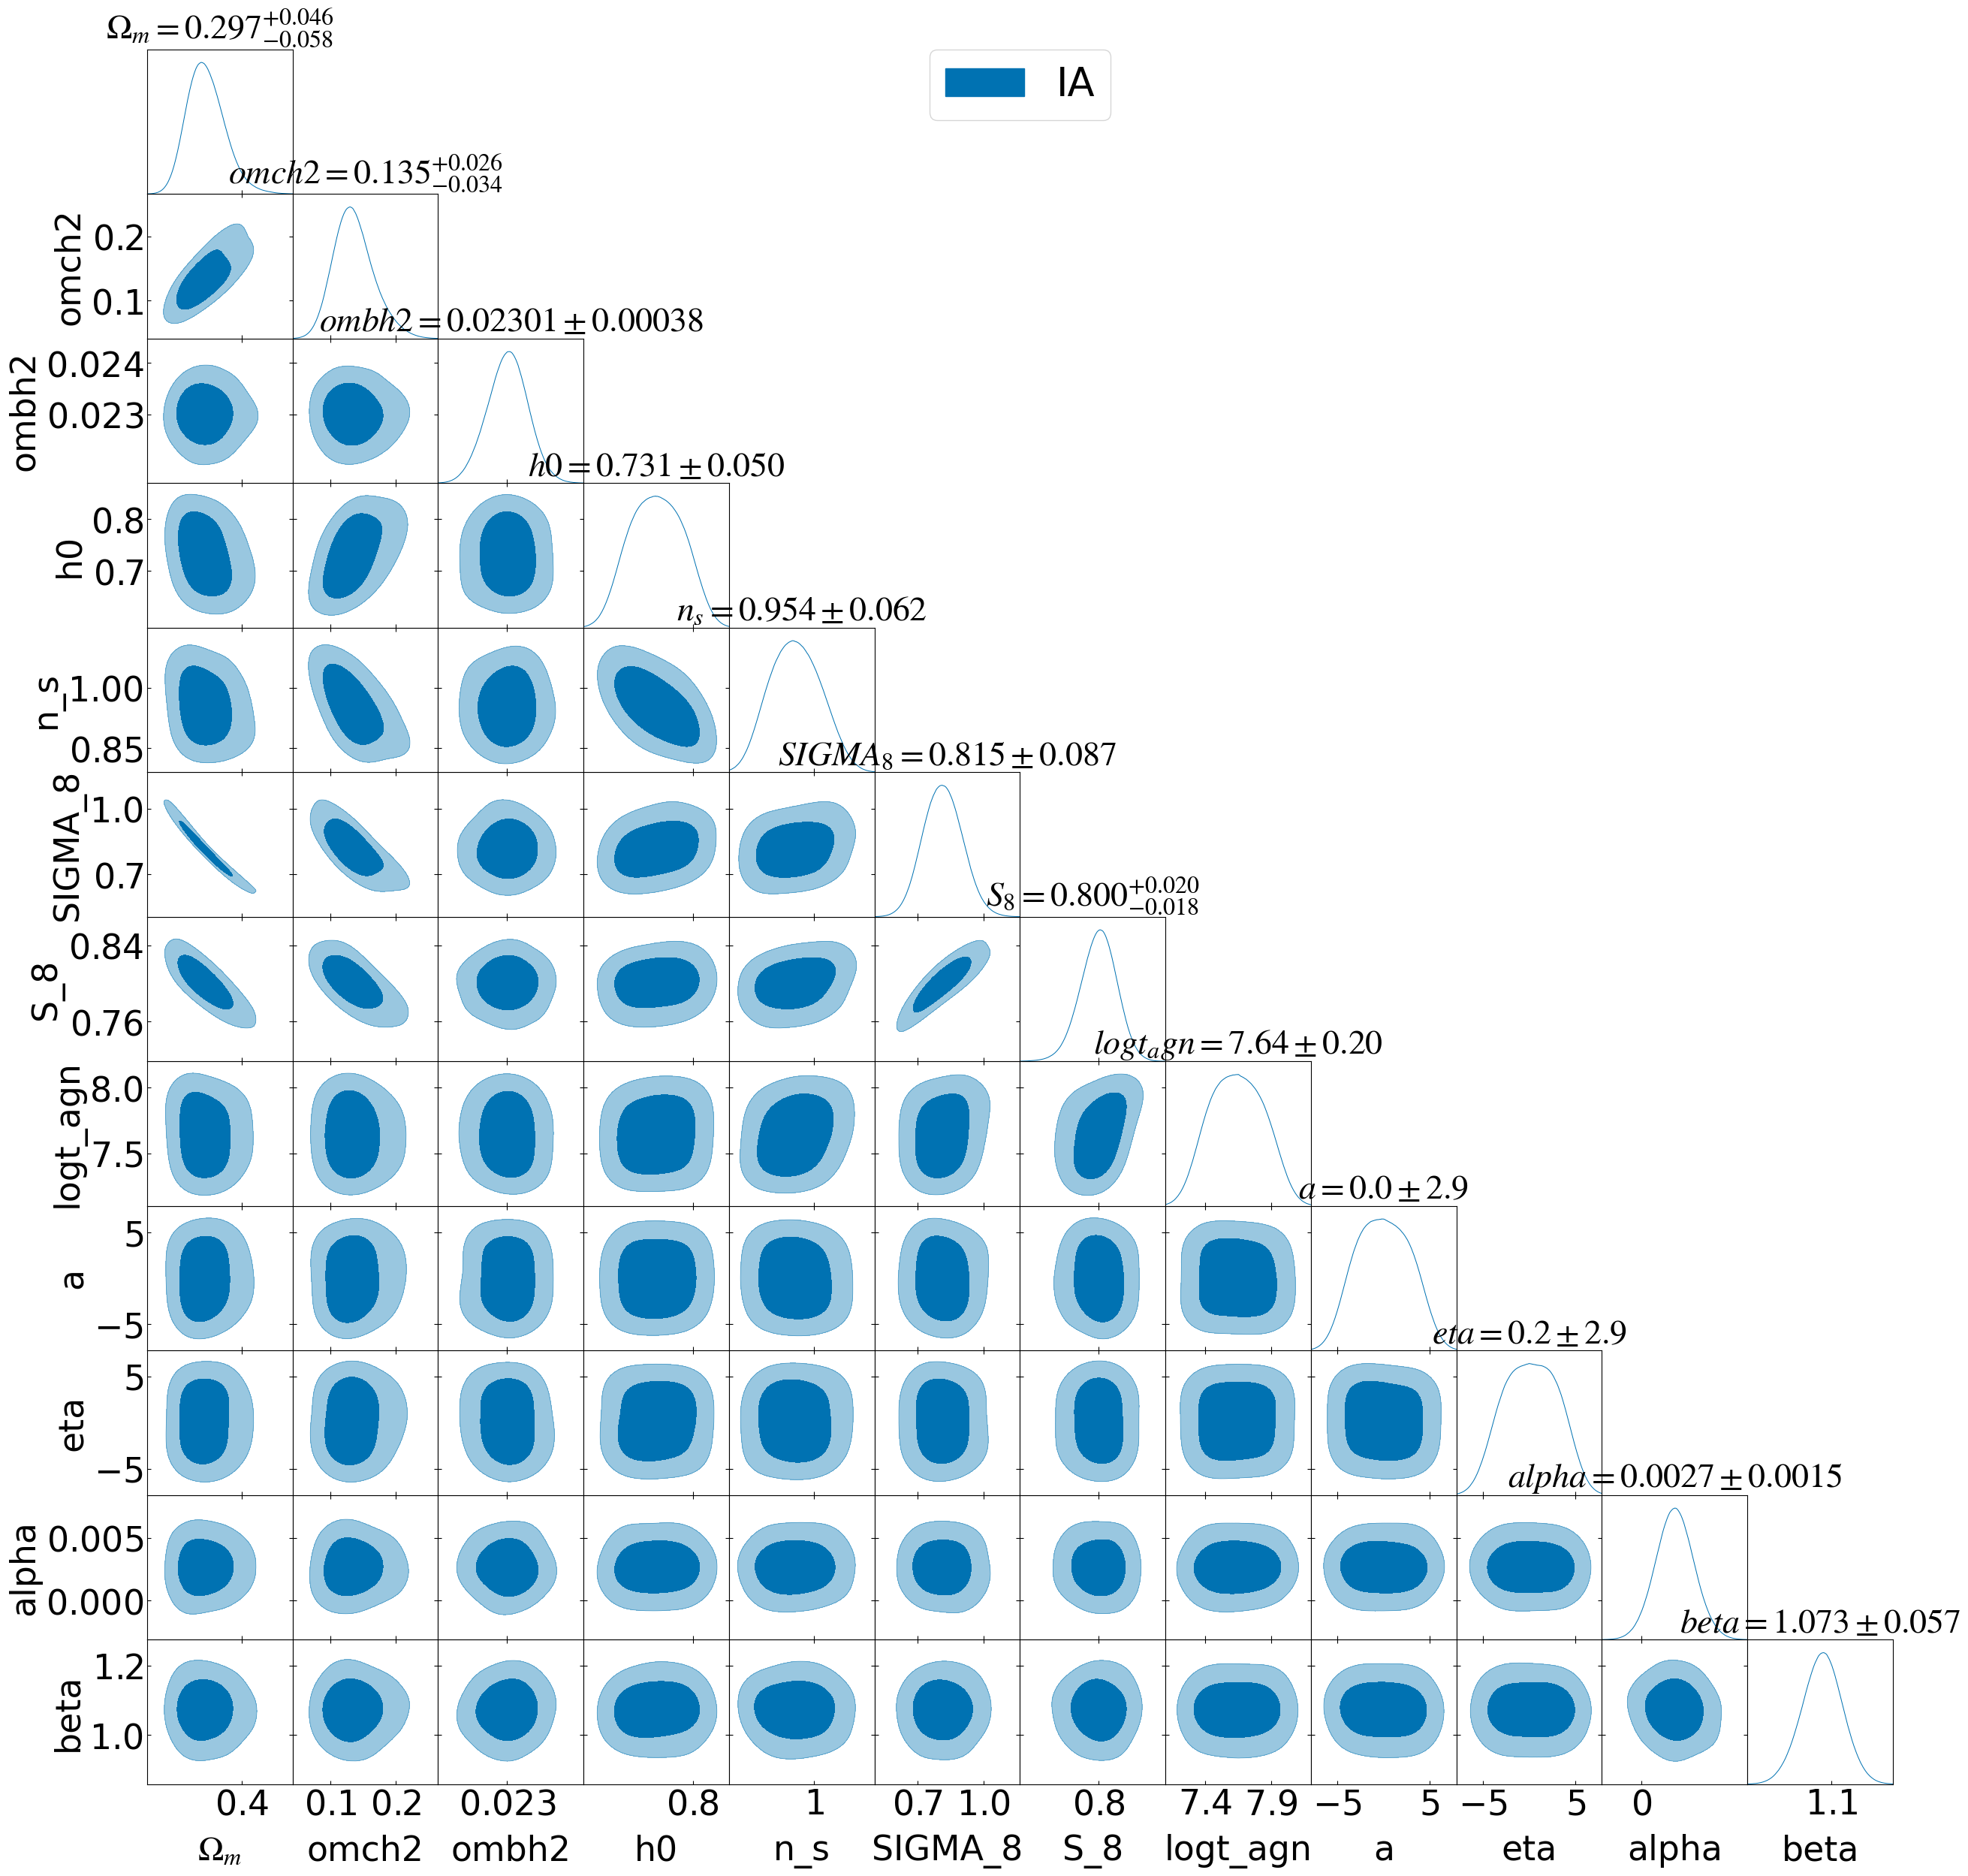

In [51]:
%matplotlib inline


g.triangle_plot(chains,
                ['Omega_m','omch2','ombh2','h0','n_s','SIGMA_8','S_8', 'logt_agn','a', 'eta', 'alpha', 'beta'],
                legend_labels=['IA', 'No IA'],
                label_order=-1,
                # param_limits={'bias_1':[-0.8,0.5]},
                contour_colors=['#0072B2', '#009E73', '#D55E00', '#CC79A7'],
                title_limit=1,
                filled=True)

# g.export('contour_plot_unions.pdf')

### Output bestfit and sigma values

In [ ]:
#########BESTFIT AND SIGMA VALS##########
params = ['omega_m','omega_b','h0','n_s','a_s','SIGMA_8','S_8','logt_agn','a','bias_1']
latex_params = [r'$\Omega_{\rm m,0}$',r'$\Omega_{\rm b,0}$',r'$h$',r'$n_{\rm s}$',r'$A_{\rm s}$',r'$\sigma_8$',r'$S_8$',
                r'$\log_{10}{T_{\rm AGN}}$',r'$\mathcal{A}_rm IA}$',r'$\Delta z$']

chains = chains[::-1]
for chain in chains:

    margestats = chain.getMargeStats()
    likestats = chain.getLikeStats()
    p=chain.getParams()

    for no in range(len(latex_params)):
        if hasattr(p,params[no]):
            param_stats = margestats.parWithName(params[no])
            a = np.array([param_stats.mean,param_stats.mean-param_stats.limits[0].lower, param_stats.limits[0].upper-param_stats.mean])
            if '%.2g' %a[1] == '%.2g' %a[2]:
                latex_params[no] += '&$%.3g\pm%.2g$'%(a[0],a[1])
            else:
                latex_params[no] += '&$%.3g_{-%.2g}^{+%.2g}$'%(a[0],a[1],a[2])
        else:
            latex_params[no] += '&$-$'

        
for param in latex_params:
    param += r'\\'
    print(param)   
